생존자 성별 비율 시각화
나이별 생존자 성별 비율 비교 시각화(하나의 figure에)

1970~2017 이동 인구수
-> 대구 전출 인구수 분석 및 시각화
-> 가장 많은 이동이 발생한 지역의 증감율(연도별) 기존 총인구수 자료 알아야 함?

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from matplotlib import rc
import seaborn as sns


In [37]:
# 1-1. titanic 생존자 성별 비율 및 나이별 생존자의 성별 비율
file_name= 'titanic.csv'

In [38]:
# [3] 데이터 프레임으로 저장
DF= pd.read_csv(file_name)

# [5] 분석 주제: 성별에 따른 나이 분포
# - 분석 컬럼 즉, 성별과 나이 컬럼이 필요
g_DF= DF.loc[:, ['sex', 'age', 'survived']]          #->lovc[행,열] ->여러개인 경우 리스트에 담기

# [5-1] 데이터 전처리: 결측치, 중복값
# - 결축치: isna(), isnull()
g_DF.isna().sum()
# -- 결측치 처리 ==>성별에 따라 치환 
# 성별에 따른 그룹화
grouobj= g_DF.groupby('sex')
# Group 객체의 속성
#  groups 속성: 그룹화된 그룹에 속하는 인덱스 정보 저장 (dict 형태)
grouobj.groups.keys()
print(grouobj.groups.values())      #반복문 돌리면 다 꺼낼수 있음

#  groups 속성: 그룹화된 그룹에 속하는 인덱스 정보 저장 (dict 형태)
print(grouobj.indices.keys())
print(grouobj.indices)

# get_gruop() 메서드 -> 특정 그룹 데이터 읽기 (DataFrame으로 반환)

for key in grouobj.groups.keys():
    print(f'\n{key}')
    print(grouobj.get_group(key).ndim, grouobj.get_group(key).shape)
    print(grouobj.get_group(key).min(), grouobj.get_group(key).max())
# 그룹별로 집계연산 수행

print(grouobj.count())
print(grouobj.min())
print(grouobj.max())
print(grouobj.mean())   
print(grouobj.median())
resultDF=grouobj.agg(['min', 'max', 'mean', 'median', 'sum'])   #->DataFrame
resultDF
resultDF.columns   #->멀티인덱스
resultDF[[('age', 'min'), ('age', 'mean')]]
# 이런식으로 표 편하게 만들수 있겠네 
def myfunc(obj):
    print(type(obj), obj.head(3))
    return obj.max()

dict_values([Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
       ...
       866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
      dtype='int64', length=314), Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
       ...
       873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
      dtype='int64', length=577)])
dict_keys(['female', 'male'])
{'female': array([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,  19,  22,  24,
        25,  28,  31,  32,  38,  39,  40,  41,  43,  44,  47,  49,  52,
        53,  56,  58,  61,  66,  68,  71,  79,  82,  84,  85,  88,  98,
       100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140,
       141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186,
       190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229,
       230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257,
       258, 259, 264, 268, 269, 272, 274, 275, 276, 279, 289, 290, 291,
       293, 297, 299, 300, 303, 306, 307, 309, 31

In [39]:
font= r'C:\Windows\Fonts\batang.ttc'
# 폰트 패밀리
font_name= fm.FontProperties(fname=font).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)

In [40]:
# 1. 생존자의 성별 비율

index= DF['survived']==1
DF_survived= DF[index]
DF_survived['sex'].value_counts() #female 233, male109

sex
female    233
male      109
Name: count, dtype: int64

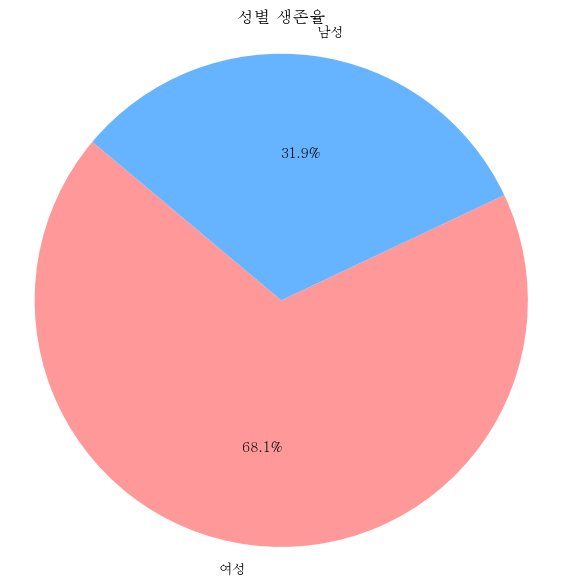

In [61]:
#그래프 그리기

# [1] 생존자 성비 그래프
labels = ['여성', '남성']
sizes = [233/342, 109/342]
colors = ['#ff9999','#66b3ff']  # 색상 설정 

# 파이차트 그리기
plt.figure(figsize=(7, 7)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('성별 생존율') 
plt.axis('equal')  # 차트 비율을 동일하게 설정하여 원형을 유지

# [2] 나이별 생존자 그래프


# 차트 보여주기
plt.show()



In [55]:
grouobj

In [43]:
# 대구 전출 인구수 분석 및 시각화

# 대구,전국 데이터 제거해야 비교 분석하기 쉬움


In [44]:
file_name= '시도별 전출입 인구수.xlsx'
DF= pd.read_excel(file_name)

In [45]:
# 데이터 처리

# 1. '-' 0 으로 치환
DF.replace('-', np.nan, inplace=True)
# 2. NaN ffill
DF['전출지별'].ffill(inplace=True)
# 3. 0번 행 제거
DF.drop(index=[0], inplace=True)
DF.tail()

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_360\1105600287.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF['전출지별'].ffill(inplace=True)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,제주특별자치도,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [46]:
DF.set_index(['전출지별', '전입지별'], inplace=True)


In [47]:
DF_daegu= DF.loc['대구광역시']
DF_daegu.dropna(how='all', axis=1, inplace=True)
DF_daegu.fillna(0, inplace=True, axis=1)

C:\Users\KDP-25\AppData\Local\Temp\ipykernel_360\3398771314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_daegu.dropna(how='all', axis=1, inplace=True)
C:\Users\KDP-25\AppData\Local\Temp\ipykernel_360\3398771314.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_daegu.fillna(0, inplace=True, axis=1)
C:\Users\KDP-25\AppData\Local\Temp\ipykernel_360\3398771314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [48]:
DF_daegu.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지별')

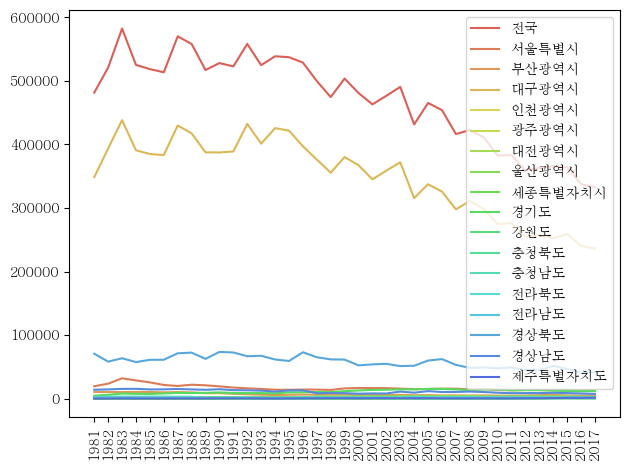

In [63]:
num_graphs = len(DF_daegu.index.to_list())
colors = sns.color_palette('hls', 27)

for idx in range(len(DF_daegu.index.to_list())):
    plt.plot(DF_daegu.iloc[idx], color=colors[idx], label=DF_daegu.index.to_list()[idx])
    


plt.xticks(rotation='vertical')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# [2] 시 또는 도 입력 --> 입력받은 도시를 바탕으로 전출데이터가 나오도